## Evaluation
We carry out testing by running the DEnKF recursively until the end of the testing sequence. Given an initial ensemble of states ${\bf X}_0$, the model only takes one observation $\bf y$ at each timestep and outputs the estimated ensemble states. The estimated states are then used as the inputs to carry on the prediction. The estimated state is recorded at each time $t$ for evaluation.

### 1. Visualization
To visualize the state estimation results, we generate plots that display each dimension of the state estimation as well as the ensemble distribution. This allows for a comprehensive view of the estimated states and their corresponding distribution.


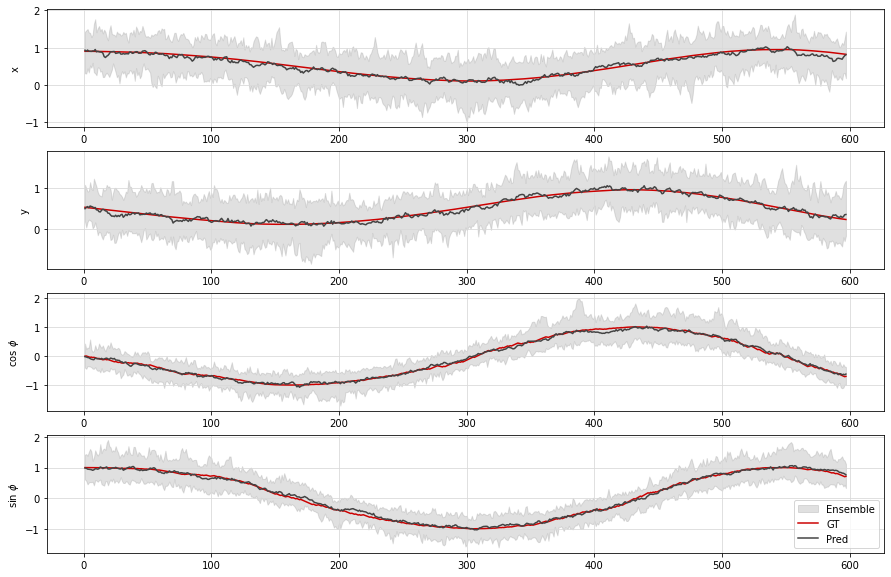

In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import os
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import math

def visualize_result():
    k_list = ['13920']
    dim_x = 4
    size_1 = 15
    size_2 = 10
    fig = plt.figure(figsize=(size_1, size_2))
    ids = 1
    for k in k_list:
        with open('./output/eval-result-'+k+'.pkl', 'rb') as f:
            data = pickle.load(f)
            test_demo = data['state']
            gt_data = data['gt']
            en = data["ensemble"]
            
            # convert the results to np
            pred = np.squeeze(np.array(test_demo))
            gt = np.squeeze(gt_data)
            en = np.squeeze(np.array(en))
            
            uncertain = np.array(en)
            en_max = np.amax(uncertain, axis=1)
            en_min = np.amin(uncertain, axis=1)

            pred = np.reshape(pred, (pred.shape[0], dim_x))
            gt = np.reshape(gt, (gt.shape[0], dim_x))
            x = np.linspace(1, gt.shape[0], gt.shape[0])
            
            legend_y = ['x', 'y', 'cos $\phi$', 'sin $\phi$']
            

        '''
        visualize the predictions
        '''
        ############## all state ################
        for i in range (dim_x):
            plt.subplot(dim_x, 1, ids)
            plt.fill_between(
                x,
                en_max[:, i].flatten(),
                en_min[:, i].flatten(),
                color="#99999996",
                alpha=0.3,
                label="Ensemble",
            )
            plt.plot(
                x,
                gt[:, i].flatten(),
                color="#cc0000ff",
                linewidth=1.5,
                label="GT",
            )
            plt.plot(
                x,
                pred[:, i].flatten(),
                linewidth=1.5,
                color="#434343ff",
                label="Pred",
            )
            ids = ids + 1
            plt.grid(color="0.85")
            plt.ylabel(legend_y[i])
            if i == dim_x -1:
                plt.legend(loc="lower right")
    plt.show()
    
visualize_result()

### 2. Results
The performance of DEnKF in high-dimension is visualized above, where we show the testing results from the model at epoch 50. The state uncertainty measured by the distribution of the ensemble members has decreased over time. Namely, the model learns to have higher posterior probability on the robot vehicle position and the orientation while being trained. The ablation studies on different DFs and the number of ensemble members are summarized in Table below. Our model results in the lowest RMSE and MAE as 3.603$\pm$0.38 and 1.669$\pm$0.03. We notice that the Bayesian sensor model $s_{\pmb {\xi}}$ is more useful in high-dimensional update step, because the learned observation $\tilde{{\bf y}}$ provides more guidance which results in reducing the final RMSE and MAE for 3.88\% and 6.17\% after the prediction step. Whereas in [1], without using $s_{\pmb {\xi}}$, the update step only reduces the final RMSE and MAE for 2.19\% and 4.31\% after the prediction step. In terms of the number of ensemble members $E$, we observe the same pattern as in the low-dimensional case that the accuracy does not increase drastically after $E = 2^{5}$.

[1] Kloss, Alina, Georg Martius, and Jeannette Bohg. "How to train your differentiable filter." Autonomous Robots 45, no. 4 (2021): 561-578.

| Method              | RMSE | MAE |
| :---------------- | :------: | :------: |
| baseline [1]      |   8.271±0.51   | 8.213±0.62 |
| $E = 2^{2}$    |  4.864±0.23   | 2.927±0.23 |
| $E = 2^{3}$ |  4.079±0.56   | 2.139±0.55  |
| $E = 2^{4}$ |  3.823±0.32    | 1.901±0.05 |
| DEnKF           |   3.603±0.38   | 1.669±0.03 |